In [1]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

from scipy.linalg import lu_factor, lu_solve, lu

from warnings import filterwarnings
filterwarnings("ignore")

1. LU и LDU матрица строго квадратная 
2. Не должны быть нули по главной оси
3. Невязки

собственный вектор матрицы A*X = lambda * x

In [ ]:
A = np.array([
    [1, 1, 1], 
    [1, 1, 2],
    [1, 2, 5],
], dtype=float)


P_scipy, L, U = lu(A)
P_scipy @ L @ U

array([[1., 1., 1.],
       [1., 1., 2.],
       [1., 2., 5.]])

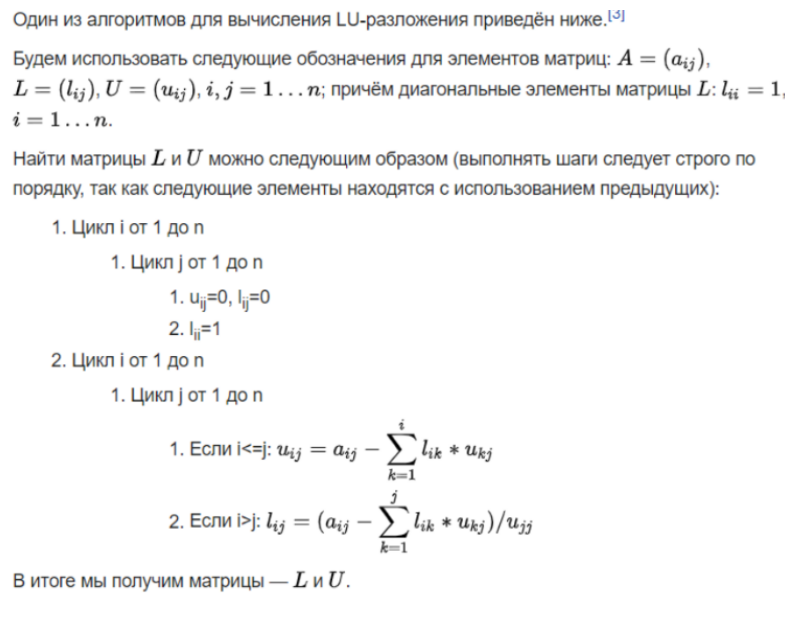

In [3]:
import cv2

img = cv2.imread("./asserts/lu.png")
plt.figure(figsize=(10, 8))
plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()

In [6]:
def lu_decomposition(A: NDArray) ->  tuple[NDArray, NDArray]:
    L = np.zeros(A.shape, dtype=float)
    U = np.zeros(A.shape, dtype=float)
    #
    n = len(L)
    for i in range(n):
        for j in range(n):
            U[i, j], L[i, j] = 0, 0
            L[i, i] = 1
    #         
    for i in range(n):
        for j in range(n):
            if i<=j:
                l_values = []
                u_values = []
                for k in range(i):
                    l_values.append(L[i, k])
                    u_values.append(U[k, j])
                U[i, j] = A[i, j] - np.sum([l_v*u_v for l_v, u_v in zip(l_values, u_values)])
            elif i>j:
                l_values = []
                u_values = []
                for k in range(i):
                    l_values.append(L[i, k])
                    u_values.append(U[k, j])
                L[i, j] = (A[i, j] - np.sum([l_v*u_v for l_v, u_v in zip(l_values, u_values)])) / U[j, j]
    return L, U


L, U = lu_decomposition(A)
L @ U

array([[ 2.,  1.,  3.],
       [11.,  7.,  5.],
       [ 9.,  8.,  4.]])

In [5]:
A = np.array([
    [ 2.,  1.0,  3.0],
    [11.,  7.0,  5.0],
    [9.0,  8.0,  4.0]
])

L = np.array([
    [1, 0, 0],
    [5.5, 1, 0],
    [4.5, 2.3333333333333335, 1]
])
U = np.array([
    [2, 1, 3],
    [0, 1.5, -11.5],
    [0, 0, 17.33333333],
])
np.allclose(A, L @ U)

True

In [7]:
E1 = np.array([
    [1, 0, 0],
    [-1, 1, 0],  # R2 = R2 - R1
    [-1, 0, 1],  # R3 = R3 - R1
], dtype=float)

A1 = E1 @ A
print("\nПосле первого шага (E1 @ A):")
print(A1)


После первого шага (E1 @ A):
[[2. 1. 3.]
 [9. 6. 2.]
 [7. 7. 1.]]


In [8]:
E2 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, -1, 1],  # R3 = R3 - R2
], dtype=float)

U = E2 @ A1
print("\nВерхняя треугольная матрица U = E2 @ E1 @ A:")
print(U)


Верхняя треугольная матрица U = E2 @ E1 @ A:
[[ 2.  1.  3.]
 [ 9.  6.  2.]
 [-2.  1. -1.]]


In [9]:
def lu_decomposition(A: NDArray) -> tuple[NDArray, NDArray]:
    n = A.shape[0]
    L = np.eye(n, dtype=float)
    U = A.copy().astype(float)
    
    for k in range(n-1):
        for i in range(k+1, n):
            # Вычисляем множитель
            L[i, k] = U[i, k] / U[k, k]
            # Вычитаем строки
            for j in range(k, n):
                U[i, j] = U[i, j] - L[i, k] * U[k, j]
    
    return L, U

# Проверяем исправленную функцию
L, U = lu_decomposition(A)
print("\nLU-разложение исправленной функцией:")
print("L =")
print(L)
print("U =") 
print(U)
print("\nПроверка L @ U =")
print(L @ U)
print("Должно равняться A =")
print(A)


LU-разложение исправленной функцией:
L =
[[1.         0.         0.        ]
 [5.5        1.         0.        ]
 [4.5        2.33333333 1.        ]]
U =
[[  2.           1.           3.        ]
 [  0.           1.5        -11.5       ]
 [  0.           0.          17.33333333]]

Проверка L @ U =
[[ 2.  1.  3.]
 [11.  7.  5.]
 [ 9.  8.  4.]]
Должно равняться A =
[[ 2.  1.  3.]
 [11.  7.  5.]
 [ 9.  8.  4.]]


In [10]:
# LDU-разложение: U = D * U_norm, где U_norm имеет единицы на диагонали
D = np.diag(np.diag(U))
U_norm = np.linalg.inv(D) @ U

print("\nLDU-разложение:")
print("L =")
print(L)
print("D =")
print(D)
print("U_norm =")
print(U_norm)
print("\nПроверка L @ D @ U_norm =")
print(L @ D @ U_norm)


LDU-разложение:
L =
[[1.         0.         0.        ]
 [5.5        1.         0.        ]
 [4.5        2.33333333 1.        ]]
D =
[[ 2.          0.          0.        ]
 [ 0.          1.5         0.        ]
 [ 0.          0.         17.33333333]]
U_norm =
[[ 1.          0.5         1.5       ]
 [ 0.          1.         -7.66666667]
 [ 0.          0.          1.        ]]

Проверка L @ D @ U_norm =
[[ 2.  1.  3.]
 [11.  7.  5.]
 [ 9.  8.  4.]]


In [11]:
# Матрицы элементарных преобразований
E1 = np.array([
    [1, 0, 0],
    [-1, 1, 0],
    [-1, 0, 1],
], dtype=float)

E2 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, -1, 1],
], dtype=float)

# Обратные матрицы (дают матрицу L)
E1_inv = np.array([
    [1, 0, 0],
    [1, 1, 0],
    [1, 0, 1],
], dtype=float)

E2_inv = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 1],
], dtype=float)

print("\nМатрицы преобразований:")
print("E1 (R2 = R2 - R1, R3 = R3 - R1):")
print(E1)
print("E2 (R3 = R3 - R2):")
print(E2)
print("\nОбратные матрицы:")
print("E1_inv:")
print(E1_inv)
print("E2_inv:")
print(E2_inv)

# Проверка: L = E1_inv @ E2_inv
L_calc = E1_inv @ E2_inv
print("\nПроверка L = E1_inv @ E2_inv:")
print(L_calc)


Матрицы преобразований:
E1 (R2 = R2 - R1, R3 = R3 - R1):
[[ 1.  0.  0.]
 [-1.  1.  0.]
 [-1.  0.  1.]]
E2 (R3 = R3 - R2):
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -1.  1.]]

Обратные матрицы:
E1_inv:
[[1. 0. 0.]
 [1. 1. 0.]
 [1. 0. 1.]]
E2_inv:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 1.]]

Проверка L = E1_inv @ E2_inv:
[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]


In [14]:
b = np.array([6, 8, 15], dtype=float)

def solve_lu_gauss(L: NDArray, U: NDArray, b: NDArray) -> NDArray:
    """
    Решение системы Ax = b через LU-разложение методом Гаусса
    A = L * U, поэтому L * U * x = b
    """
    n = len(b)
    
    print("=" * 50)
    print("РЕШЕНИЕ СИСТЕМЫ Ax = b ЧЕРЕЗ LU-РАЗЛОЖЕНИЕ")
    print("=" * 50)
    
    # Шаг 1: Решаем L * y = b (прямая подстановка)
    print("\n1. РЕШАЕМ L * y = b (прямая подстановка):")
    y = np.zeros(n, dtype=float)
    
    for i in range(n):
        print(f"\nШаг {i+1}: Находим y[{i}]")
        print(f"Уравнение: L[{i},:] * y = b[{i}]")
        
        sum_Ly = 0.0
        for j in range(i):
            term = L[i, j] * y[j]
            sum_Ly += term
            print(f"  + L[{i},{j}] * y[{j}] = {L[i, j]:.1f} * {y[j]:.1f} = {term:.1f}")
        
        y[i] = b[i] - sum_Ly
        print(f"  y[{i}] = b[{i}] - ({sum_Ly:.1f}) = {b[i]:.1f} - {sum_Ly:.1f} = {y[i]:.1f}")
    
    print(f"\nВектор y = {y}")
    
    # Шаг 2: Решаем U * x = y (обратная подстановка)
    print("\n2. РЕШАЕМ U * x = y (обратная подстановка):")
    x = np.zeros(n, dtype=float)
    
    for i in range(n-1, -1, -1):
        print(f"\nШаг {n-i}: Находим x[{i}]")
        print(f"Уравнение: U[{i},:] * x = y[{i}]")
        
        sum_Ux = 0.0
        for j in range(i+1, n):
            term = U[i, j] * x[j]
            sum_Ux += term
            print(f"  + U[{i},{j}] * x[{j}] = {U[i, j]:.1f} * {x[j]:.1f} = {term:.1f}")
        
        x[i] = (y[i] - sum_Ux) / U[i, i]
        print(f"  x[{i}] = (y[{i}] - ({sum_Ux:.1f})) / U[{i},{i}]")
        print(f"  x[{i}] = ({y[i]:.1f} - {sum_Ux:.1f}) / {U[i, i]:.1f} = {x[i]:.1f}")
    
    return x


x = solve_lu_gauss(L, U, b)
print(f"Решение x = {x}")
print(f"Проверка A @ x = {A @ x}")
print(f"Должно быть b = {b}")

РЕШЕНИЕ СИСТЕМЫ Ax = b ЧЕРЕЗ LU-РАЗЛОЖЕНИЕ

1. РЕШАЕМ L * y = b (прямая подстановка):

Шаг 1: Находим y[0]
Уравнение: L[0,:] * y = b[0]
  y[0] = b[0] - (0.0) = 6.0 - 0.0 = 6.0

Шаг 2: Находим y[1]
Уравнение: L[1,:] * y = b[1]
  + L[1,0] * y[0] = 5.5 * 6.0 = 33.0
  y[1] = b[1] - (33.0) = 8.0 - 33.0 = -25.0

Шаг 3: Находим y[2]
Уравнение: L[2,:] * y = b[2]
  + L[2,0] * y[0] = 4.5 * 6.0 = 27.0
  + L[2,1] * y[1] = 2.3 * -25.0 = -58.3
  y[2] = b[2] - (-31.3) = 15.0 - -31.3 = 46.3

Вектор y = [  6.         -25.          46.33333333]

2. РЕШАЕМ U * x = y (обратная подстановка):

Шаг 1: Находим x[2]
Уравнение: U[2,:] * x = y[2]
  x[2] = (y[2] - (0.0)) / U[2,2]
  x[2] = (46.3 - 0.0) / 17.3 = 2.7

Шаг 2: Находим x[1]
Уравнение: U[1,:] * x = y[1]
  + U[1,2] * x[2] = -11.5 * 2.7 = -30.7
  x[1] = (y[1] - (-30.7)) / U[1,1]
  x[1] = (-25.0 - -30.7) / 1.5 = 3.8

Шаг 3: Находим x[0]
Уравнение: U[0,:] * x = y[0]
  + U[0,1] * x[1] = 1.0 * 3.8 = 3.8
  + U[0,2] * x[2] = 3.0 * 2.7 = 8.0
  x[0] = (y[0] - (11

In [16]:
from scipy.linalg import lu_factor, lu_solve, lu

# LU-разложение scipy
P_scipy, L_scipy, U_scipy = lu(A)
print(f"\nLU-разложение scipy (с перестановками):")
print("P =")
print(P_scipy)
print("L =")
print(L_scipy)
print("U =")
print(U_scipy)
print("P @ L @ U =")
print(P_scipy @ L_scipy @ U_scipy)

# Решение системы
lu, piv = lu_factor(A)
x_scipy = lu_solve((lu, piv), b)
print(f"\nРешение scipy: x = {x_scipy}")


LU-разложение scipy (с перестановками):
P =
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
L =
[[ 1.          0.          0.        ]
 [ 0.81818182  1.          0.        ]
 [ 0.18181818 -0.12        1.        ]]
U =
[[11.          7.          5.        ]
 [ 0.          2.27272727 -0.09090909]
 [ 0.          0.          2.08      ]]
P @ L @ U =
[[ 2.  1.  3.]
 [11.  7.  5.]
 [ 9.  8.  4.]]

Решение scipy: x = [-2.92307692  3.82692308  2.67307692]
